# Analyse Data - Student Academics Performance Dataset


The aim of these set of questions is to assess your level of understanding in analysing a new dataset. This first set of questionnaire provides a set of questions that you should answer to output some visualisations. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#using a pandas style
plt.style.use('ggplot')

**1. Load the Dataset csv file (Student_Performance.csv) and count the attributes describing the data**

In [2]:
#csv dataset file is read using pandas
dataset = pd.read_csv("Student_Performance.csv")

**2. Can you display the list of attributes?**

In [3]:
#.columns gets the name of each column
dataset.columns

Index(['Gender', 'Caste', 'GCSE_Performance', 'Alevel_Performance',
       'InternalAssesment_Performance', 'FinalExam_Performance', 'Has_Arrears',
       'MartialStatus', 'TownOrVillage', 'Admission_Category',
       'FamilyMonthlyIncome', 'Family_Size', 'Father_Qualifications',
       'Mother_Qualifications', 'Father_Occupation', 'Mother_Occupation',
       'Number_of_friends', 'Study_Hours', 'School_Type', 'Language',
       'College_Traveltime', 'Class_Attendance'],
      dtype='object')

**3. Display any 10 entries in this dataset. Explain below how you chose the entries.**

**4. Find the total number of enteries in the system.**

In [5]:
count_enteries = dataset.shape[0]  # gives number of row count
print("Number of enteries")
print(count_enteries)


Number of enteries
131


**5. Find the number of Male and Female students.**

In [6]:
#find where M appears in Gender column and find length of the found 'M's
males = len(dataset[dataset['Gender'] == 'M'])
#find where F appears in Gender column and print the length of found 'F's
females = len(dataset[dataset['Gender'] == 'F'])
print("Number of males")
print(males)
print("Number of females")
print(females)

Number of males
72
Number of females
59


**6. How did the students perform in their Final exams?**

In [7]:
#use value_counts on the final exam column to count each peform category
final_exams = dataset['FinalExam_Performance'].value_counts()
final_exams_mode = dataset['FinalExam_Performance'].mode()
print(final_exams)
print("The students generally peformed " + final_exams_mode)

Good    54
Vg      42
Pass    27
Best     8
Name: FinalExam_Performance, dtype: int64
0    The students generally peformed Good
dtype: object


**7. What is the qualification for majority of the Fathers?**

In [8]:
#peform value count on father_qualifications shows the spread of qualifications
father_qualification = dataset['Father_Qualifications'].value_counts()
#.mode() shows most common value
father_qualification_mode = dataset['Father_Qualifications'].mode()
print(father_qualification)
print("Qualification for majority of fathers is " + father_qualification_mode)

Um        40
10        23
12        22
Il        20
Degree    20
Pg         6
Name: Father_Qualifications, dtype: int64
0    Qualification for majority of fathers is Um
dtype: object


**8. What is the least favourite occupation among the Mothers of the students?**

In [9]:
#peform value_counts on mother_occupation to return spread of occupations
mother_occupation = dataset['Mother_Occupation'].value_counts()
mother_occupation

Housewife    115
Service       12
Others         2
Business       1
Retired        1
Name: Mother_Occupation, dtype: int64

**9. Find the number of students who performed consistently in their internal assesment and final exams?**

In [10]:
#take each column and store in variable
internalassesment_performance = dataset['InternalAssesment_Performance']
finalexam_performance = dataset['FinalExam_Performance'] 
#create a new dataset where we store the rows where the values are equal
consistent_performance = (finalexam_performance == internalassesment_performance)
#get number of rows in dataset
dataset[consistent_performance].shape[0]

70

**10. Find the number of students who performed consistently in all their academics?**
   

In [11]:

gcse_performance = dataset['GCSE_Performance']
alevel_performance = dataset['Alevel_Performance']
#use of & operator to compare the performances, 3 compares needed as
#1 was completed in previous question
dataset_consistent = dataset[(internalassesment_performance == finalexam_performance) & 
                   (gcse_performance == alevel_performance) &
                   (alevel_performance == internalassesment_performance)]
#get number of rows of the dataset which shows number of students
dataset_consistent.shape[0]

33

 **11. How many are top performing students among these?**

In [12]:
#consistent performance has already been found - can use any of performance 
#columns to find the "top performing students"
#consider the best performing students to be the top performing shows 1 student
best = dataset_consistent['Alevel_Performance'] == 'Best'
dataset_consistent[best]

,Gender,Caste,GCSE_Performance,Alevel_Performance,InternalAssesment_Performance,FinalExam_Performance,Has_Arrears,MartialStatus,TownOrVillage,Admission_Category,...,Father_Qualifications,Mother_Qualifications,Father_Occupation,Mother_Occupation,Number_of_friends,Study_Hours,School_Type,Language,College_Traveltime,Class_Attendance
49,M,G,Best,Best,Best,Best,N,Unmarried,T,Paid,...,12,Um,Service,Housewife,Large,Average,Private,Eng,Small,Average


## Visuallize different aspects of the data! 

  **12. Plot bar graph to show the distribution of students from locations (Town and Village), with different Languages, different School types.**

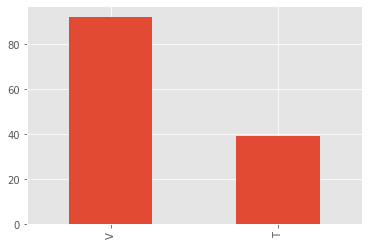

In [13]:
#bar chart to show number of Village students vs number of Town students
#required column selected then count each student in town and village
dataset['TownOrVillage'].value_counts().plot(kind="bar")



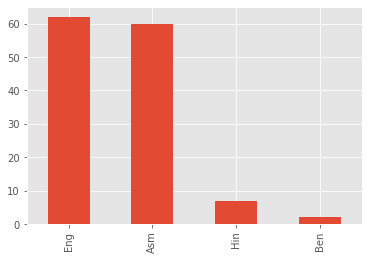

In [14]:
#bar chart to show number of students that speak different languages
#required column selected then value counts the column to give number of peoplethat speak each type of language spoke
dataset['Language'].value_counts().plot(kind="bar")

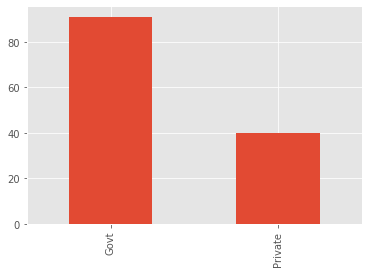

In [15]:
#bar chart to show type of school stuents attend
dataset['School_Type'].value_counts().plot(kind="bar")

**13. Find and plot distribution of student performance among town and Village students.**

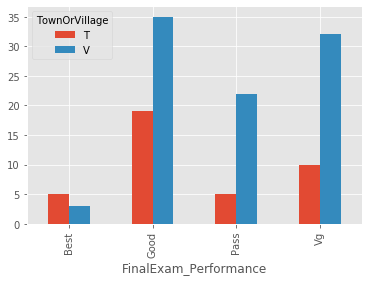

In [16]:
#student peformance graph showing how students performed in final exams (student performace perceived as Final exam score) and whether they lived in a town or village
#grouping the 2 exam performances with the town and village and using size to find number of each town or village type
performance_tv = dataset.groupby(['FinalExam_Performance', 'TownOrVillage']).size().unstack().plot.bar()

**14. Find and plot distribution of student performance based on the type of study hours invested.**

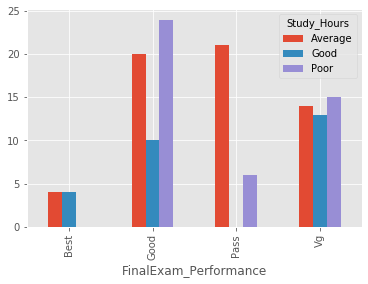

In [17]:
#student performance perceived as Final exam score,stacked bar chart to show scores vs how many hours were invested
hours_performance = dataset.groupby(['FinalExam_Performance','Study_Hours']).size().unstack().plot.bar()


**15. Plot a simple plot for the travel time distribution of the students.**

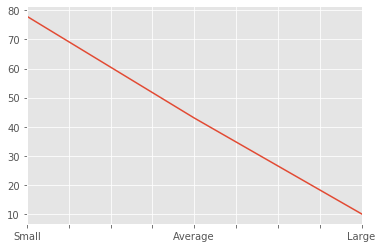

In [18]:
#college traveltime column selected and frequency of each value counted and plotted
travel_time = dataset['College_Traveltime'].value_counts().plot()


**16. Find the relation plotted as line and bar graph of the College_Traveltime to Class_Attendance.**

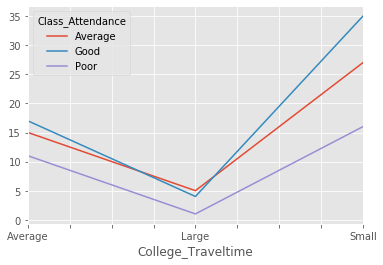

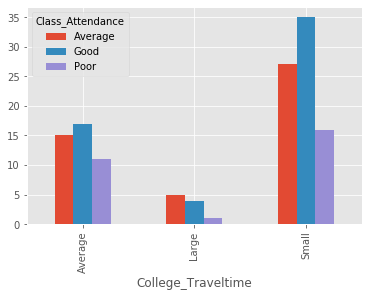

In [19]:
#tried to create on same graph but problems with overlapping
#line = dataset.groupby(['Class_Attendance']).count()['Gender'].plot()
#bar = dataset.groupby(['College_Traveltime']).count()['Gender'].plot.bar(color = 'blue')
#shows how many people with different traveltime lengths attend class 
#group by college_traveltime and class_attendance find the size of each and plot 
line = dataset.groupby(['College_Traveltime', 'Class_Attendance']).size().unstack().plot()
#same but plot bar
bar = dataset.groupby(['College_Traveltime', 'Class_Attendance']).size().unstack().plot.bar()

***17. Plot the distribution of family Income.***

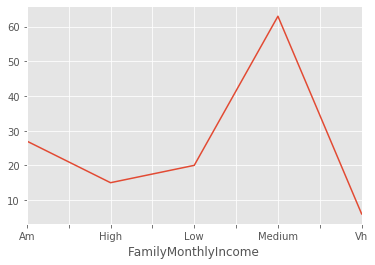

In [20]:
#line graph to show family income amongst students
family_income = dataset.groupby(['FamilyMonthlyIncome']).count()['Gender'].plot()



***18. Find the relation of the FamilyMonthlyIncome to Family_Size plotted as a bar graph. Fill in the missing data with zeros and later with non-zeros for a bar plot***

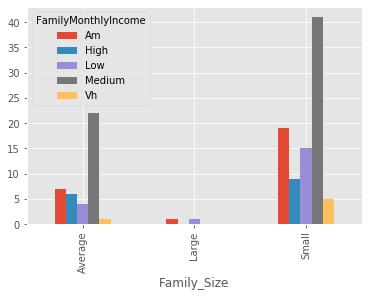

In [21]:
#graph show how the family monthly income varies with the family size
#group the required columns find size of each and re arrange into preffered structure to plot bar chart
size_income = dataset.groupby(['Family_Size','FamilyMonthlyIncome']).size().unstack().plot(kind='bar')


***19.Can you plot one or more Stacked bar plots like combining number of friends with the Study Hours? Hint: you may have to map these to have same numerical values. Sample graph shown below.***

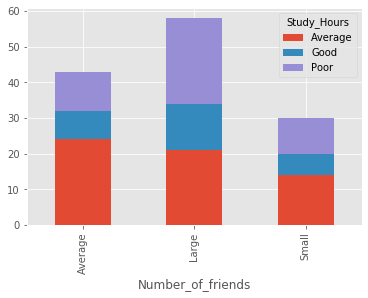

In [22]:
#grouping number of friends and study hours taking the size then unstacking the data to arrange it
#plot a bar with stacked being true
friends_study = dataset.groupby(['Number_of_friends', 'Study_Hours']).size().unstack().plot.bar(stacked=True)

## Some more observations on the data! 

***20. Present examples of data analytics problems that can be addressed with this data. Explain in detail how the data leads to these conclusions. Do you have any prescriptive measures to propose for identified problems?***


***(Answer in not more than 500 words.)***

Examples of data analytics problems that can be addressed with this data include using it to form relations between different attributes. Student’s with parents in certain occupations could be prone to lower performance across academics, this can be plotted. Data analytics can highlight these issues predict possible future outcomes. This could involve looking at the different performances over time which could give likelihood of future results. Students that performed consistently across the board will be more likely to continue to perform at a steady rate and students with a wider variety of ranging performance will be harder to predict the outcomes. Combining multiple factors to predit student’s future results, if student has a lower grade in previous assessments school could recommend that they study for longer or they attend class more often.
Data analysis could be used to predict what job students are likely to get in the future, their parent’s jobs are likely to impact what they end up doing e.g students who’s business. The kind of place they live in could also have an effect on future job’s e.g a student who’s father is a farmer and who lives in a village would be more likely to become a farmer than a student with a farmer as a father and who lives in a town.
A problem could be that the school is building toilets and changing rooms but they don’t know how many students they need to be used by. The data can also be used by the school to get an idea of how many students are going to be attending in the coming years and the ratio between men and female. This allowing for knowledge on number of pupils before the school has received actual confirmed students. Analysis could be used to look at how the number of friend’s varies with the language spoken, this could result in school encouraging communication pupils with different languages.
